An Artificial Neural Network is a computational modelling tool that is comprised of densely interconnected adaptive simple processing elements that are capable of performing massively parallel computations for data processing and knowledge representation (Hecht-Nielsen, 1990).

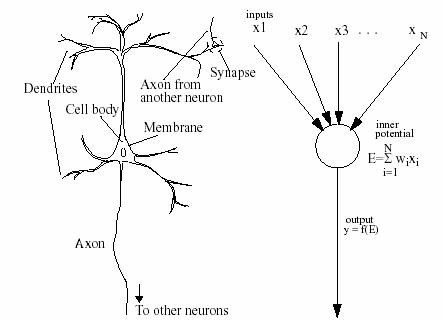

## Perceptron

Perceptron is a a single layer artifical network with only one neuron based on an Linear Threshold Unit(i.e the inputs and outputs are numbers and each input is associated with a weight). The Perceptron is a newtork in which the neuron unit calculates the linear combination of its real valued or boolean inputs and passes it through a threshold activation function.

Both biological and ANN learn by incrementally adjusting the magnitudes of the weights or synapse's strengths.

Hebbian Learning -a synapse between two neurons is strengthened when the neurons on either side of the synapse (input and output) have highly correlated outputs.When an input neuron fires and it frequently leads to the firing of the output neuron, the synapse is strengthened  and the connection weight is increased with high correlation  between sequential neurons.

An ANN is said to have learnt if it can:
- handle imprecise, fuzzy , noisy and probabilistic information without noticeable adverse effect on the response quality
- generalize from the tasks it has learned to unknown ones


*Perceptron Learning Rule*
$$ w_{i,j}^{next step} = w_{i,j} + \eta (y_j - \hat{y}_j)x_i$$

The decision boundary of each output neuron is linear, that means perceptrons are incapable of learning complex patterns, but can easily converge for linearly seperable instances. (Perceptron Convergence Theorem).Perceptrons do not output a class probability, rather, they make predictions based on hard thresholds.

Scikit learn perceptron is equivalent to using a SGDClassifier with the following hyperparameters:loss = "perceptron", learning_rate = "constant", eta0= 1, penalty = None

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target== 0).astype(np.int)
per_clf = Perceptron(random_state = 42)
per_clf.fit(X,y)

y_pred = per_clf.predict([2, 0.5])

## Multi-Layer Perceptron and Backpropagation

An MLP is composed of one (passthrough) input layer,one or more years of LTUs (hidden layers) and one final layer of LTUs called the output layer. Every layer except the output layer includes a bias neuron and is fully connected to the next layer. An ANN with two or more hidden layers is called a deep neural network.

**Feed Forward Error Back Propagation** - the forward sweep involves presenting the network with one training example. Each input node transmits a value to each hidden node and a summation is performed by the dot product of all values of input nodes and their corresponding interconnection weights. The activations calculated at the output nodes represent the solution of the fed example which may deviate from the target solution. In the backsweep, the network computes howmuch each neuron in the last hidden layer contributed to each output neuron's error until the input layer, measuring the error gradient across all connection weights in the network. The last step of the backpropagation  algorithm is a Gradient Step on all the connection weights in the network using the error gradients.

*Consider an MLP with L interlayers, it has the following neuron dynamics*
$$ \xi_j ^{l} = \sum\limits_{i = 1} ^{N_{l-1}} w_{ji}^{l}x_{i}^{l-1}$$

*The corresponding activation $x_{j}^{i}$ of the neuron is determined using a transfer function $\sigma$ that converts the total signal into real number from a bounded interval

$$ x_{j}^{l}=\sigma(\xi_j ^{l}) = \sigma (\sum\limits_{i = 1} ^{N_{l-1}} w_{ji}^{l}x_{i}^{l-1})$$

Popular functions used in the back propagation algorithm are:

Hyperbolic tangent function   $$ tanh z = \frac{sinh z}{cos z}$$

Rectifier function   $$ f(x) = log(1 + exp x) $$

Logistic Function    $$ \sigma(\xi) = \frac{1}{1+ exp ^{-\xi}} $$



## Training an MLP with TensorFlow

In [ ]:
import tensorflow as tf
feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units = [300, 100], n_classes = 10, feature_columns = feature_cols)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf)
dnn_clf.fit(X_train, y_train, batch_size= 50, steps = 40000)

## Training a DNN Using Plain TensorFlow

In [ ]:
#Construction Phase

import tensorflow as tf

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2= 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = "X")  # acts as the input layer
y = tf.placeholder(tf.int64, shape = (None), name = "y")

# creating an actual neuron layer

def neuron_layer (X, n_neurons, name, activation = None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])    # get number of inputs by looking up the input matrix's shape
        stddev = 2/np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev = stddev)
        W = tf.Variable(init, name = "kernel")    # variable that holds weight matrix
        b = tf.Variable(tf.zeros([n_neurons]), name = "bias") # b variable for bias
        z = tf.matmul(X, W) + b # subgraph to compute the weighted sums of the inputs plus the bias term
        if activation is not None:
            return activation(Z)    # tf.nn.relu is an example of an activation parameter
        else:
            return Z   # code returns activation or just

#creating a deep neural network

with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name = "hidden1", activation = tf.nn.relu)
    hidden2 = neuron_layer(X, n_hidden2, name = "hidden2", activation = tf.nn.relu)
    hidden3 = neuron_layer(X, n_hidden3, name = "hidden3", activation = tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name = "outputs")

#alternative method to creating ann

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name = "hidden1", activation = tf.nn.relu)
    hidden2 = tf.layers.dense(X, n_hidden2, name = "hidden2", activation = tf.nn.relu)
    logits = tf.layers.dense(hidden2,n_outputs, name = "outputs")

#using cross entropy to calculate cost function and to train model

with tf.name_scope("loss"):
    xentropy = tf.nn.space_softmax_cross_entropy_with_logics(labels = y, logits = logits)
    loss = tf.reduce_mean(xentropy, name = "loss")
    
#defining a Gradient Descent Optimizer to tweak the model parameters to minimize the cost function

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

#specifying how to evaluate the model

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

# a model to initialise all the variables
init = tf.global_variables_initializer()
saver = tf.train.Saver()

# Execution Phase

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

# define the number of epochs and mini batches
n_epochs = 40
batch_size = 50

# training the model:

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range (mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X:X_batch, y:y_batch})
            acc_train= accuracy.eval(feed_dict={X:X_batch, y:y_batch})
            acc_test = accuracy.eval(feed_dict={X:mnist.test.images,
                                               y:mnist.test.labels})
            print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)
        
        save_path = saver.save(sess, "./my_model_final.ckpt")
        
# using the neural network

with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt")
    X_new_scaled = []
    Z = logits.eval(feed_dict = {X:X_new_scaled})
    y_pred = np.argmax(Z, axis = 1)

## Neural Network Hyperparameters 

There are too many ways in which one can tweak the hyperparameters of a neural network that include network topology, number of layers, number of neurons per layer, type of activation function, weight initialization logic, cross validation and grid search to name just but a few.

Any MLP can model even the most complex functions provided it has enough neurons but deep networks have a higher parameter efficiency and can model complex functions using exponentially fewer neurons, making them faster to train.Deep Neural Networks have hierarchical architecture which helps them converge faster at a solution: lower hidden layers model low level structures, intermediate hidden layers combine these low level structures to model intermediate level structures and the highest hidden layers and the output layers combine these intermediate structures to model high level structures.

The rectifier linear unit activation function is ideal for hidden layers as it is faster to compute and for the output layer, the softmax activation function is generally a good choice for classification tasks.